### Extracting Data

In [68]:
!ls ../../dsc-phase-1-project-v2-4/zippedData/

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [69]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import zipfile

In [70]:
conn = sqlite3.connect("../../dsc-phase-1-project-v2-4/zippedData/im.db")

In [71]:
pd.read_sql("SELECT * FROM movie_basics", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [18]:
movie_gross_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/bom.movie_gross.csv.gz")
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [38]:
rt_movie_info_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/rt.movie_info.tsv.gz",
                            sep = "\t")
rt_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [39]:
rt_reviews_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/rt.reviews.tsv.gz",
                            sep = "\t",
                            encoding = "ISO-8859-1")
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [56]:
tmdb_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/tmdb.movies.csv.gz")
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [57]:
movie_budgets_df = pd.read_csv("../../dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv.gz")
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [102]:
genre_id = {
    "Action" : 28,
    "Adventure" : 12,
    "Animation" : 16,
    "Comedy" : 35,
    "Crime" : 80,
    "Documentary" : 99,
    "Drama" : 18,
    "Family" : 10751,
    "Fantasy" : 14,
    "History" : 36,
    "Horror" : 27,
    "Music" : 10402,
    "Mystery" : 9648,
    "Romance" : 10749,
    "Science Fiction" : 878,
    "TV Movie" : 10770,
    "Thriller" : 53,
    "War" : 10752,
    "Western" : 37
}

In [109]:
genre_id = {str(y) : x for x, y in genre_id.items()}

### Cleaning

In [64]:
tmdb_df_clean = tmdb_df.copy()

In [65]:
tmdb_df_clean['genre_ids'] = tmdb_df["genre_ids"]
    .str.replace("[", "")
    .str.replace("]", "")
    .str.replace(",", "")
    .str.split(" ")

In [74]:
tmdb_df_clean

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [76]:
tmdb_df_clean.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [83]:
tmdb_df_clean = tmdb_df_clean.loc[tmdb_df_clean['vote_count'] >= 1000]
tmdb_df_clean

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
24112,24112,"[53, 18, 80, 9648]",446791,en,All the Money in the World,10.941,2017-12-25,All the Money in the World,6.4,1200
24128,24128,"[35, 18, 878]",301337,en,Downsizing,10.682,2017-12-22,Downsizing,5.1,1887
24169,24169,"[16, 18, 9648]",339877,en,Loving Vincent,10.025,2017-09-22,Loving Vincent,8.2,1200
24231,24231,[18],538362,it,Sulla mia pelle,9.161,2018-09-12,On My Skin,8.2,1078


In [84]:
tmdb_df_clean.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,12391.898917,197302.502708,16.712528,6.694856,3622.119134
std,7695.060107,139617.270072,8.066124,0.767238,3080.641080
min,0.000000,62.000000,0.600000,4.100000,1000.000000
25%,5252.750000,64670.250000,11.570500,6.175000,1501.750000
50%,11316.000000,188544.000000,14.750000,6.700000,2477.000000
75%,20617.250000,318863.750000,19.131250,7.225000,4426.500000
max,24268.000000,569547.000000,80.773000,8.600000,22186.000000


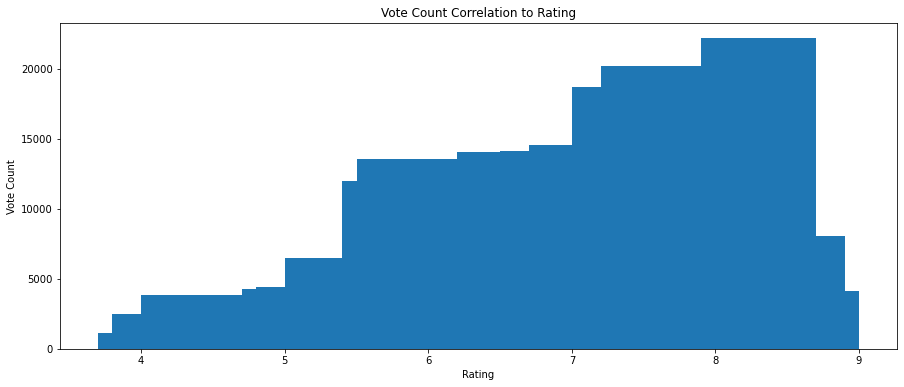

In [88]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(tmdb_df_clean['vote_average'], tmdb_df_clean['vote_count'])
ax.set_title("Vote Count Correlation to Rating")
ax.set_ylabel("Vote Count")
ax.set_xlabel("Rating")
plt.show()

In [99]:
exploded_genres = tmdb_df_clean.explode(column = "genre_ids").groupby("genre_ids").mean().reset_index().drop(columns = ["Unnamed: 0", "id"])
exploded_genres

,genre_ids,popularity,vote_average,vote_count
0,10402,16.100850,7.125000,2675.650000
1,10749,13.902675,6.871250,2902.668750
2,10751,18.536241,6.851880,4202.834586
3,10752,20.310125,7.116667,4630.333333
4,10770,13.515500,6.900000,1511.000000
5,12,21.199918,6.585106,5477.684397
6,14,20.450343,6.525143,4701.502857
7,16,18.970178,7.055446,4112.396040
8,18,14.855374,6.987029,3171.836820
9,27,14.509191,6.211450,2524.389313


In [111]:
exploded_genres['genre_ids'] = exploded_genres['genre_ids'].map(genre_id)

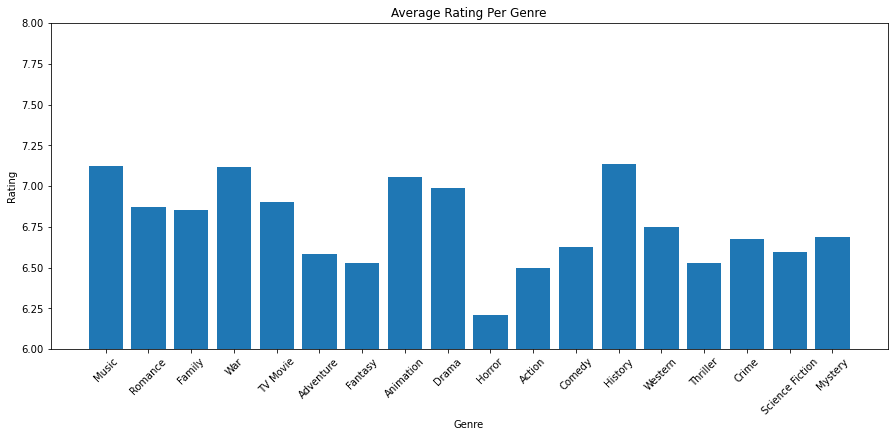

In [118]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.bar(exploded_genres['genre_ids'], exploded_genres['vote_average'])
ax.set_title("Average Rating Per Genre")
ax.set_ylabel("Rating")
ax.set_xlabel("Genre")
ax.set_ylim(6,8)
plt.xticks(rotation = 45)
plt.show()